In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [3]:
# Audit data
train_fname = "../csv/audit_train.csv"
test_fname = "../csv/audit_test.csv"
col_class = 'Risk'
train_data = pd.read_csv(train_fname, header=0)
X_train, y_train = train_data.drop(col_class, axis=1), train_data[col_class]
test_data = pd.read_csv(test_fname, header=0)
X_test, y_test = test_data.drop(col_class, axis=1), test_data[col_class]

In [29]:
def train_and_evaluate(X_train, X_test, y_train, y_test, nneighbors, roc_fname="roc.png", **kwargs):
    """
    Trains a kNN classifier and displays metrics of its performance on the test data;
    Returns the classifier
    """
    ## Training the classifier
    cls = KNeighborsClassifier(n_neighbors=nneighbors, algorithm='kd_tree', **kwargs)
    cls.fit(X_train, y_train)

    ## Predicting
    predictions = cls.predict(X_test)

    ## Computing the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print("Confusion matrix is:")
    print(cm)
    # if there are only two classes, compute more refined quantities
    # and print ROC curve
    if cm.size == 4:
        tn, fp, fn, tp = cm.ravel()
        print(f"Error rate {(fp + fn) * 1. / (fp + fn + tp + tn)}")
        print(f"False alarm rate {fp * 1. / (fp + tn)}")
        detection = tp * 1. / (tp + fn)
        print(f"Detection rate {detection}")
        precision = tp * 1. / (tp + fp)
        print(f"Precision {precision}")
        print(f"F-score {2 * detection * precision / (detection + precision)}")

        ## Drawing a ROC curve
        RocCurveDisplay.from_estimator(cls, X_test, y_test)
        plt.savefig(roc_fname)

    return cls, cm

In [5]:
def normalize(X_train, X_test, method='mean_std'):
    """
    Normalizes all the features by linear transformation.
    Two normalization methods are implemented:

      -- `mean_std` shifts by the mean and divides by the standard deviation

      -- `maxmin` shifts by the min and divides by the difference between max and min

      *Note*: mean/std/max/min are computed on the training data
    The function returns a pair normalized_train, normalized_test. For example,
    """
    # scaling
    normalized_train, normalized_test = None, None
    if method == 'mean_std':
        normalized_train = (X_train - X_train.mean()) / X_train.std()
        normalized_test = (X_test - X_train.mean()) / X_train.std()
    elif method == 'maxmin':
        normalized_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
        normalized_test = (X_test - X_train.min()) / (X_train.max() - X_train.min())
    else:
        raise f"Unknown method {method}"

    # gluing back the class column and returning
    return normalized_train, normalized_test

In [6]:
def get_audit_data():
    ## Reading the data
    train_fname = "../csv/audit_train.csv"
    test_fname = "../csv/audit_test.csv"
    col_class = 'Risk'
    train_data = pd.read_csv(train_fname, header=0)
    X_train, y_train = train_data.drop(col_class, axis=1), train_data[col_class]
    test_data = pd.read_csv(test_fname, header=0)
    X_test, y_test = test_data.drop(col_class, axis=1), test_data[col_class]

    return X_train, X_test, y_train, y_test

In [7]:
def get_digits_data():
    digits = load_digits()
    X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=42)
    return X_train, X_test, y_train, y_test

Confusion matrix is:
[[ 70   3]
 [ 17 110]]
Error rate 0.1
False alarm rate 0.0410958904109589
Detection rate 0.8661417322834646
Precision 0.9734513274336283
F-score 0.9166666666666666


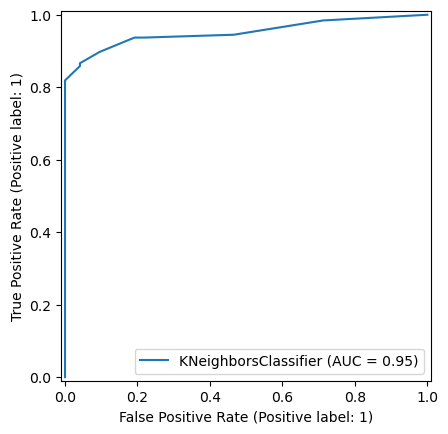

In [8]:
X_train, X_test, y_train, y_test = get_audit_data()

## Train & Test !
N = 10
cls = train_and_evaluate(X_train, X_test, y_train, y_test, N)

Confusion matrix is:
[[ 69   4]
 [ 16 111]]
Error rate 0.1
False alarm rate 0.0547945205479452
Detection rate 0.8740157480314961
Precision 0.9652173913043478
F-score 0.9173553719008265


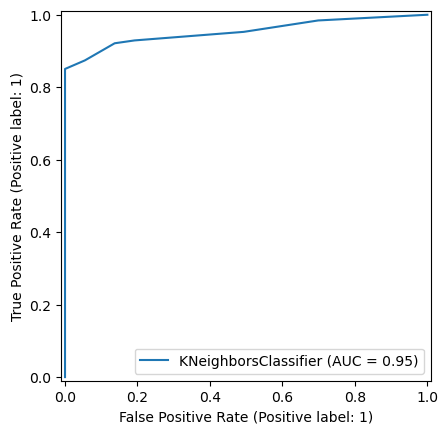

In [9]:
X_train, X_test = normalize(X_train, X_test)

## Train & Test !
N = 10
cls = train_and_evaluate(X_train, X_test, y_train, y_test, N)

Confusion matrix is:
[[ 71   2]
 [ 13 114]]
Error rate 0.075
False alarm rate 0.0273972602739726
Detection rate 0.8976377952755905
Precision 0.9827586206896551
F-score 0.9382716049382717


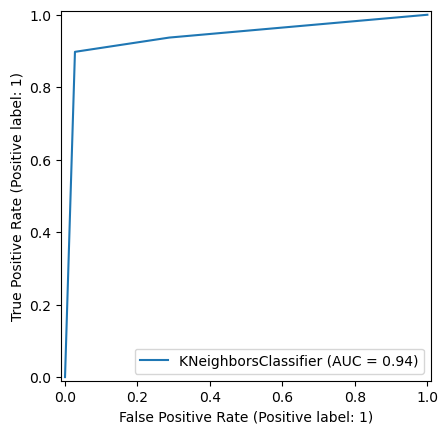

In [10]:
## Train & Test !
N = 2
cls = train_and_evaluate(X_train, X_test, y_train, y_test, N, roc_fname="roc2.png")

Confusion matrix is:
[[ 71   2]
 [ 14 113]]
Error rate 0.08
False alarm rate 0.0273972602739726
Detection rate 0.889763779527559
Precision 0.9826086956521739
F-score 0.9338842975206613


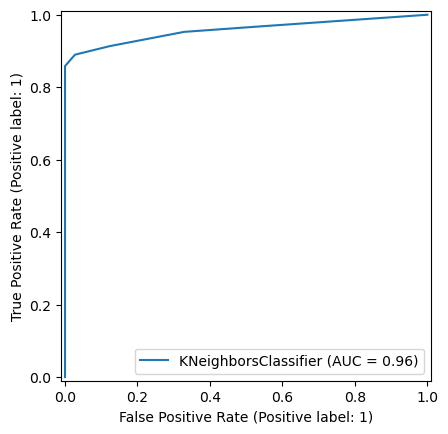

In [11]:
## Train & Test !
N = 6
cls = train_and_evaluate(X_train, X_test, y_train, y_test, N, roc_fname="roc6.png")

Confusion matrix is:
[[ 69   4]
 [ 16 111]]
Error rate 0.1
False alarm rate 0.0547945205479452
Detection rate 0.8740157480314961
Precision 0.9652173913043478
F-score 0.9173553719008265


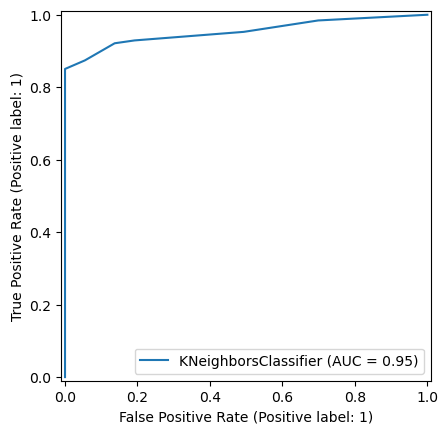

In [12]:
## Train & Test !
N = 10
cls = train_and_evaluate(X_train, X_test, y_train, y_test, N, roc_fname="roc10.png")

In [18]:
X_train, X_test, y_train, y_test = get_digits_data()
N = 15
cm = train_and_evaluate(X_train, X_test, y_train, y_test, N, roc_fname="roc15.png")

Confusion matrix is:
[[67  0  0  0  0  0  0  0  0  0]
 [ 0 71  1  0  0  0  0  0  0  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 69  0  0  0  1  1  0]
 [ 0  0  0  0 78  0  0  0  0  0]
 [ 0  0  0  0  1 79  1  0  0  2]
 [ 0  0  0  0  0  0 69  0  0  0]
 [ 0  0  0  0  0  0  0 71  0  0]
 [ 0  4  0  0  0  0  0  0 60  1]
 [ 0  0  0  1  0  1  0  2  0 73]]


In [21]:
diag_sum = cm.trace()
cm.sum() - diag_sum

16

In [23]:
cm[0].size

10

In [25]:
cm.sum(axis=1) - cm.diagonal()

array([0, 1, 0, 2, 0, 4, 0, 0, 5, 4], dtype=int64)

In [30]:
X_train, X_test, y_train, y_test = get_digits_data()
N = 15
cls, cm = train_and_evaluate(X_train, X_test, y_train, y_test, N, roc_fname="roc15.png", p=5)

Confusion matrix is:
[[67  0  0  0  0  0  0  0  0  0]
 [ 0 70  2  0  0  0  0  0  0  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 69  0  0  0  1  1  0]
 [ 0  1  0  0 76  0  1  0  0  0]
 [ 0  0  0  0  1 80  0  0  0  2]
 [ 0  0  0  0  0  0 69  0  0  0]
 [ 0  0  0  0  0  0  0 71  0  0]
 [ 0  2  0  0  0  0  0  0 63  0]
 [ 0  0  0  1  0  1  0  2  1 72]]


In [31]:
cls

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=15, p=5)

In [28]:
diag_sum = cm.trace()
cm.sum() - diag_sum

14